In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, r2_score
from sklearn.model_selection import GridSearchCV

In [39]:
dataset=pd.read_csv('C:/Users/Dhairya Parikh/Desktop/CarEvaluation Project/Data/car_data.csv')
print(dataset.shape)

print(dataset)


(1000, 5)
     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


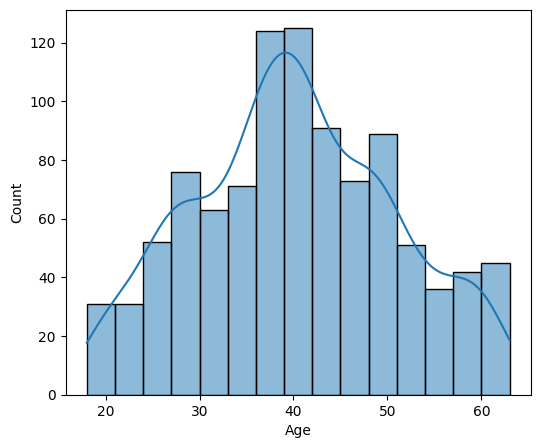

In [40]:
fig=plt.figure(figsize = (6,5))
sns.histplot(data = dataset , x = 'Age' , kde = True)
plt.show()

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='AnnualSalary'>

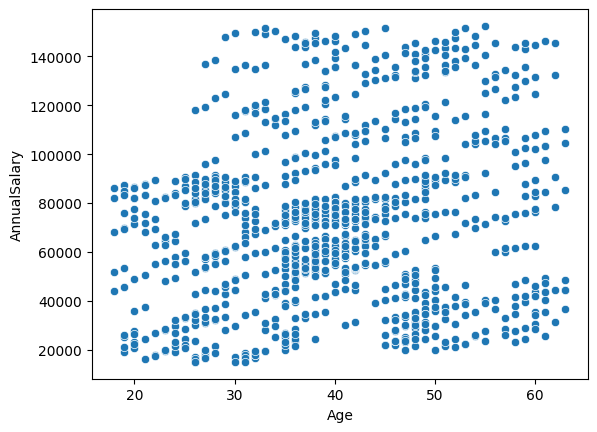

In [41]:
sns.scatterplot(x="Age",y="AnnualSalary",data=dataset)

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

<Axes: >

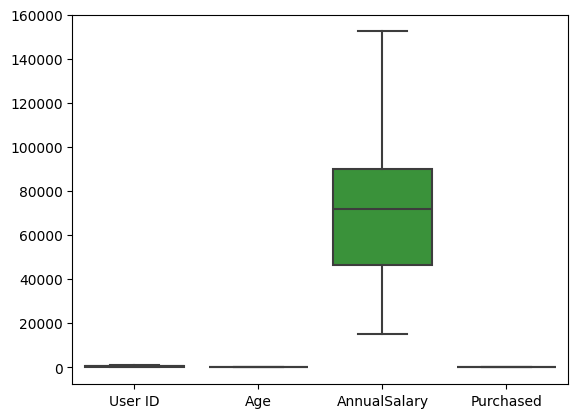

In [42]:
sns.boxplot(dataset)

In [43]:
dataset.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [45]:
dataset.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

<Axes: >

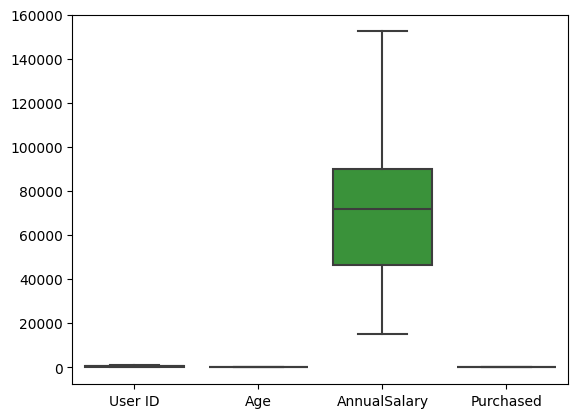

In [46]:
sns.boxplot(dataset)

In [47]:
X=dataset.drop(columns=["Purchased"],axis=1)
X.head()

,User ID,Gender,Age,AnnualSalary
0,385,Male,35,20000
1,681,Male,40,43500
2,353,Male,49,74000
3,895,Male,40,107500
4,661,Male,25,79000


In [48]:
Y=dataset["Purchased"]
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Gender"]=le.fit_transform(X["Gender"])
X["Gender"]

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    0
997    0
998    0
999    0
Name: Gender, Length: 1000, dtype: int32

In [50]:
X.head()

,User ID,Gender,Age,AnnualSalary
0,385,1,35,20000
1,681,1,40,43500
2,353,1,49,74000
3,895,1,40,107500
4,661,1,25,79000


In [51]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [52]:
x_scaled

,User ID,Gender,Age,AnnualSalary
0,0.384384,1.0,0.377778,0.036364
1,0.680681,1.0,0.488889,0.207273
2,0.352352,1.0,0.688889,0.429091
3,0.894895,1.0,0.488889,0.672727
4,0.660661,1.0,0.155556,0.465455
...,...,...,...,...
995,0.862863,1.0,0.444444,0.320000
996,0.799800,0.0,0.644444,0.061818
997,0.406406,0.0,0.222222,0.898182
998,0.298298,0.0,0.666667,0.865455


In [53]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.3,random_state=909)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 4), (300, 4), (700,), (300,))

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
     


DecisionTreeClassifier()

In [56]:
pred=dtc.predict(x_test)
pred
     


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], d

In [57]:
y_test


106    0
363    1
721    0
974    0
165    1
      ..
689    0
959    1
850    1
37     1
604    0
Name: Purchased, Length: 300, dtype: int64

[Text(0.4880642361111111, 0.9642857142857143, 'x[2] <= 0.589\ngini = 0.476\nsamples = 700\nvalue = [427, 273]'),
 Text(0.2378472222222222, 0.8928571428571429, 'x[3] <= 0.551\ngini = 0.296\nsamples = 470\nvalue = [385, 85]'),
 Text(0.11458333333333333, 0.8214285714285714, 'x[0] <= 0.993\ngini = 0.075\nsamples = 387\nvalue = [372, 15]'),
 Text(0.10069444444444445, 0.75, 'x[3] <= 0.404\ngini = 0.07\nsamples = 386\nvalue = [372, 14]'),
 Text(0.08680555555555555, 0.6785714285714286, 'gini = 0.0\nsamples = 232\nvalue = [232, 0]'),
 Text(0.11458333333333333, 0.6785714285714286, 'x[2] <= 0.411\ngini = 0.165\nsamples = 154\nvalue = [140, 14]'),
 Text(0.10069444444444445, 0.6071428571428571, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.1284722222222222, 0.6071428571428571, 'x[0] <= 0.151\ngini = 0.292\nsamples = 79\nvalue = [65, 14]'),
 Text(0.05555555555555555, 0.5357142857142857, 'x[0] <= 0.114\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.027777777777777776, 0.46428571428571

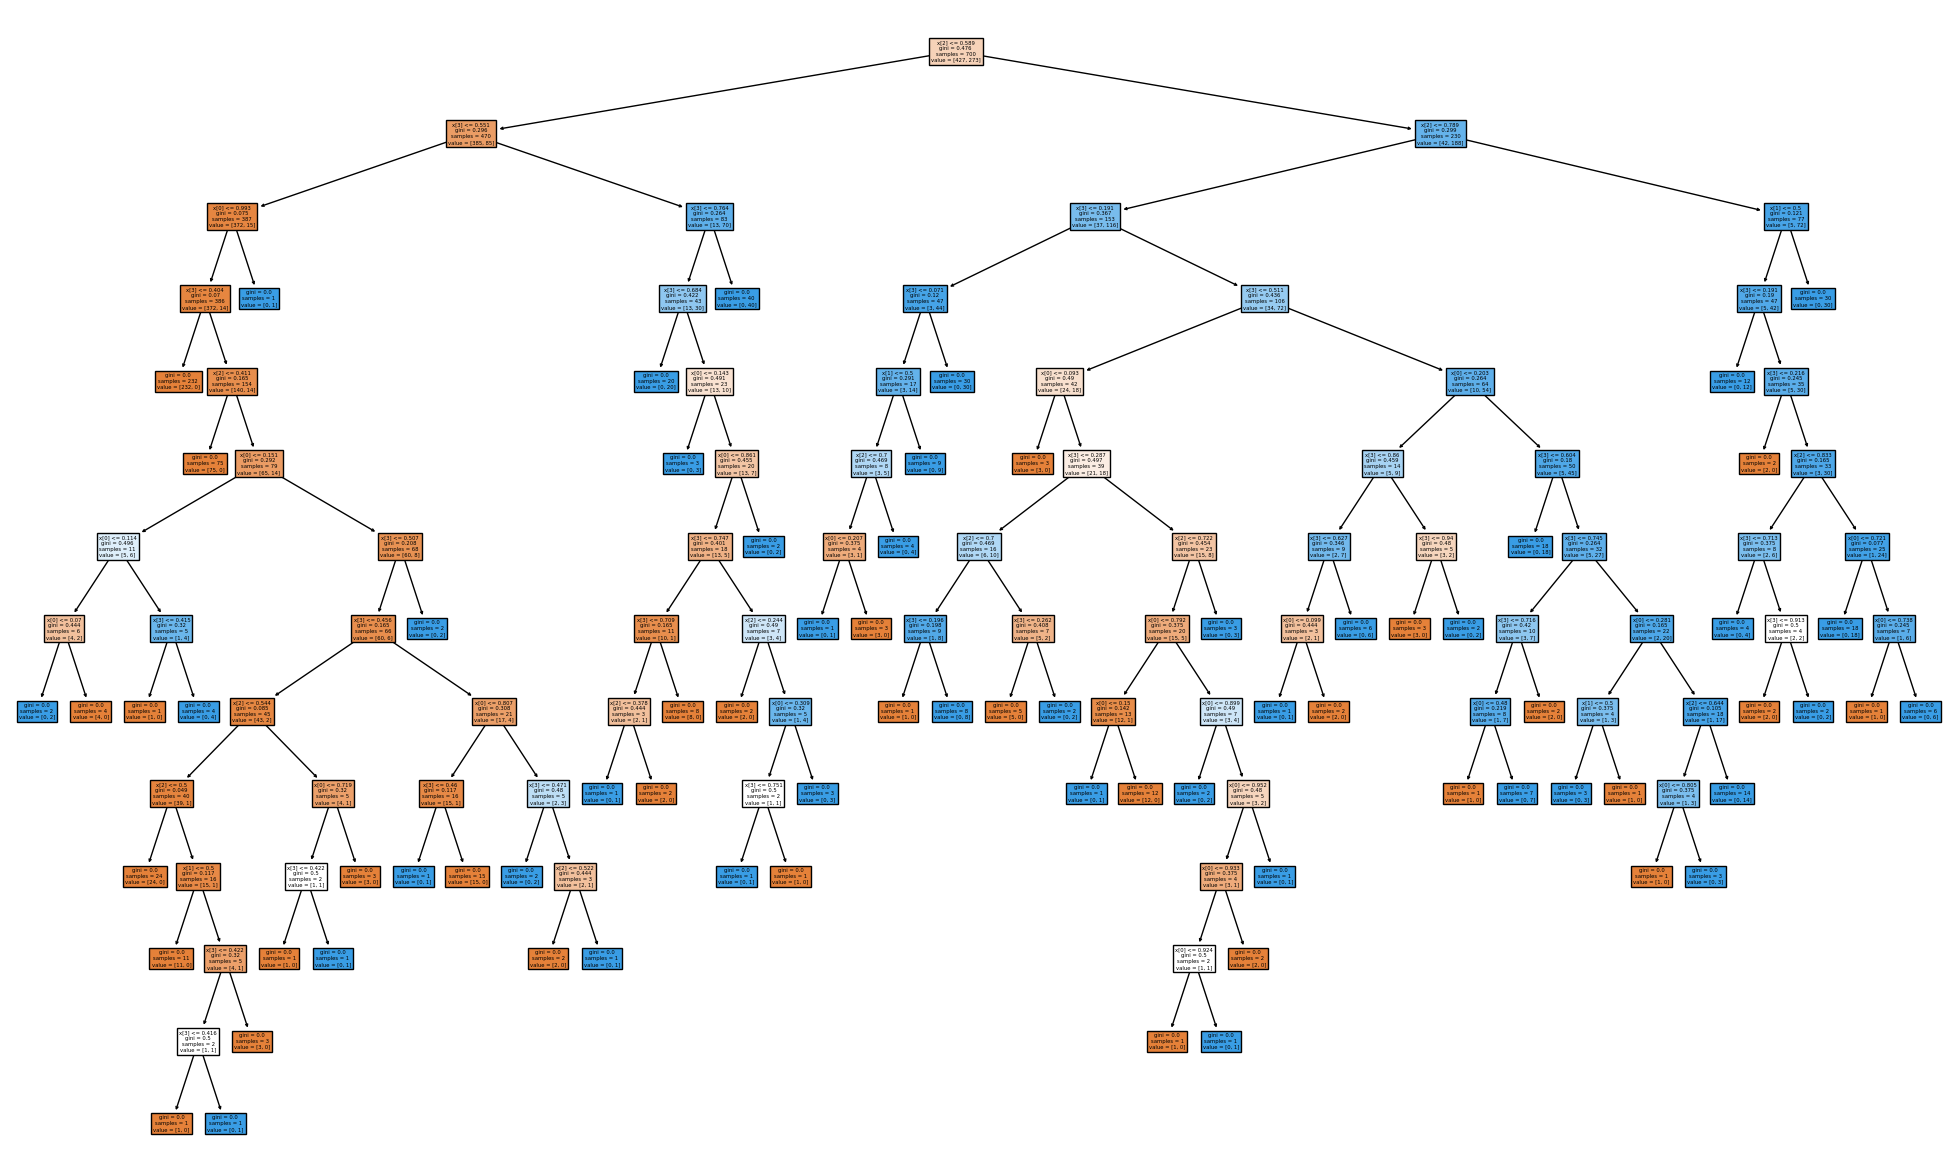

In [58]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [59]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}


In [60]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [61]:
grid_search.fit(x_train,y_train)

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Pyth

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [63]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [64]:
pred=dtc_cv.predict(x_test)

In [66]:
print(r2_score(y_test,pred))

0.6056031551747586


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       171
           1       0.86      0.94      0.90       129

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
accuracy_score(y_test,pred)

0.9066666666666666

In [ ]:
confusion_matrix(y_test,pred)

array([[151,  20],
       [  8, 121]], dtype=int64)

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,151,20
1,8,121


In [ ]:
prediction = dtc_cv.predict((np.array([[0.799800 , 0.0 , 0.644444 , 0.061818]])))

if prediction[0] == 'Purchased' :
    binary_prediction = 1
else:
    binary_prediction = 0

print("The Purchase prediction  for the given customer criteria is : ", binary_prediction)

The Purchase prediction  for the given customer criteria is :  0


c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dtc_cv.predict([[385,1,35,20000]])

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
dtc_cv.predict(ms.transform([[385,1,35,20000]]))

c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Dhairya Parikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
import pickle
pickle.dump(dtc_cv,open('model.pkl','wb'))
pickle.dump(ms,open('scaler.pkl','wb'))
